# HR Analytics Project- Understanding the Attrition in HR

Problem Statement:
    
    Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [119]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

# Importing the dataset

In [2]:
df1=pd.read_csv("IBM_HR_Analytics.tsv",sep='\t')
df1

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

# EDA

In [3]:
df1.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [4]:
df1.sample(5)

Age Attrition     BusinessTravel  DailyRate              Department  \
1416   38        No      Travel_Rarely       1321                   Sales   
463    26       Yes      Travel_Rarely        471  Research & Development   
107    25       Yes      Travel_Rarely        240                   Sales   
1249   29       Yes      Travel_Rarely        428                   Sales   
1389   31        No  Travel_Frequently       1125  Research & Development   

      DistanceFromHome  Education    EducationField  EmployeeCount  \
1416                 1          4     Life Sciences              1   
463                 24          3  Technical Degree              1   
107                  5          3         Marketing              1   
1249                 9          3         Marketing              1   
1389                 1          3     Life Sciences              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
1416            1995  ...                         1            80   
463              622  ...                         2            80   
107              142  ...                         4            80   
1249            1752  ...                         3            80   
1389            1956  ...                         2            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1416                 2                 16                      3   
463                  0                  1                      3   
107                  0                  6                      1   
1249                 0                  2                      3   
1389                 0                 10                      6   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
1416               3              15                 13   
463                1               1                  0   
107                3               6                  4   
1249               3               2                  2   
1389               3              10                  8   

      YearsSinceLastPromotion  YearsWithCurrManager  
1416                        5                     8  
463                         0                     0  
107                         0                     3  
1249                        2                     2  
1389                        8                     7  

[5 rows x 35 columns]

In [5]:
df1.tail()

Age Attrition     BusinessTravel  DailyRate              Department  \
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9                  6   
1469               4               4                  3   

      YearsSinceLastPromotion  YearsWithCurrManager  
1465                        0                     3  
1466                        1                     7  
1467                        0                     3  
1468                        0                     8  
1469                        1                     2  

[5 rows x 35 columns]

In [6]:
df1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

The total rows are 1470 and columns are 35.

The input variables are 'Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'.

The Label/target variable is 'Attrition'.

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Checking Null Values

In [8]:
df1.isnull()

Age  Attrition  BusinessTravel  DailyRate  Department  \
0     False      False           False      False       False   
1     False      False           False      False       False   
2     False      False           False      False       False   
3     False      False           False      False       False   
4     False      False           False      False       False   
...     ...        ...             ...        ...         ...   
1465  False      False           False      False       False   
1466  False      False           False      False       False   
1467  False      False           False      False       False   
1468  False      False           False      False       False   
1469  False      False           False      False       False   

      DistanceFromHome  Education  EducationField  EmployeeCount  \
0                False      False           False          False   
1                False      False           False          False   
2                False      False           False          False   
3                False      False           False          False   
4                False      False           False          False   
...                ...        ...             ...            ...   
1465             False      False           False          False   
1466             False      False           False          False   
1467             False      False           False          False   
1468             False      False           False          False   
1469             False      False           False          False   

      EmployeeNumber  ...  RelationshipSatisfaction  StandardHours  \
0              False  ...                     False          False   
1              False  ...                     False          False   
2              False  ...                     False          False   
3              False  ...                     False          False   
4              False  ...                     False          False   
...              ...  ...                       ...            ...   
1465           False  ...                     False          False   
1466           False  ...                     False          False   
1467           False  ...                     False          False   
1468           False  ...                     False          False   
1469           False  ...                     False          False   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                False              False                  False   
1                False              False                  False   
2                False              False                  False   
3                False              False                  False   
4                False              False                  False   
...                ...                ...                    ...   
1465             False              False                  False   
1466             False              False                  False   
1467             False              False                  False   
1468             False              False                  False   
1469             False              False                  False   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0               False           False               False   
1               False           False               False   
2               False           False               False   
3               False           False               False   
4               False           False               False   
...               ...             ...                 ...   
1465            False           False               False   
1466            False           False               False   
1467            False           False               False   
1468            False           False               False   
1469            False           False               False   

      YearsSinceLas

In [9]:
df1.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [10]:
df1.isnull().sum().sum()

0

<AxesSubplot:>

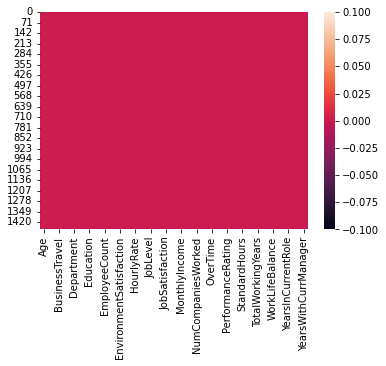

In [11]:
sns.heatmap(df1.isnull())

There is no null values present in the dataset.

In [12]:
# Checking empty space.

df1.loc[df1['Attrition']==" "]

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 35 columns]

In [13]:
df1['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

# Summary Statistics

In [14]:
df1.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [15]:
df1.describe().transpose()

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

In [16]:
df1.drop(["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"], axis=1, inplace=True)

Here i drop four columns from the dataset.

EmployeeCount - This column fully filled with 1, which cannot provide much information related to target variable.

EmployeeNumber - It provides unique values to every employees, this details are not related to attrition.

Over18 - Again this column has single value for all rows, it doesnt add much importance to the target variable.

StandardHours - This column have hours calculation for all the employees, while droping this column will not make much difference in target variable.

In [17]:
df1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [18]:
df1.shape

(1470, 31)

In [19]:
df1

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                    1          2  Life Sciences                        2   
1                    8          1  Life Sciences                        3   
2                    2          2          Other                        4   
3                    3          4  Life Sciences                        4   
4                    2          1        Medical                        1   
...                ...        ...            ...                      ...   
1465                23          2        Medical                        3   
1466                 6          1        Medical                        4   
1467                 4          3  Life Sciences                        2   
1468                 2          3        Medical                        4   
1469                 8          3        Medical                        2   

      Gender  ...  PerformanceRating  RelationshipSatisfaction  \
0     Female  ...                  3                         1   
1       Male  ...                  4                         4   
2       Male  ...                  3                         2   
3     Female  ...                  3                         3   
4       Male  ...                  3                         4   
...      ...  ...                ...                       ...   
1465    Male  ...                  3                         3   
1466    Male  ...                  3                         1   
1467    Male  ...                  4                         2   
1468    Male  ...                  3                         4   
1469    Male  ...                  3                         1   

      StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  \
0                    0                 8                      0   
1                    1                10                      3   
2                    0                 7                      3   
3                    0                 8                      3   
4                    1                 6                      3   
...                ...               ...                    ...   
1465                 1                17                      3   
1466                 1                 9                      5   
1467                 1                 6                      0   
1468                 0                17                      3   
1469                 0                 6                      3   

     WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                  1               6                   4   
1                  3              10                   7   
2                  3               0                   0   
3                  3               8                   7   
4                  3               2                   2   
...              ...             ...                 ...   
1465               3               5                   2   
1466               3               7                   7   
1467              

# Visulaization

<AxesSubplot:xlabel='Attrition', ylabel='count'>

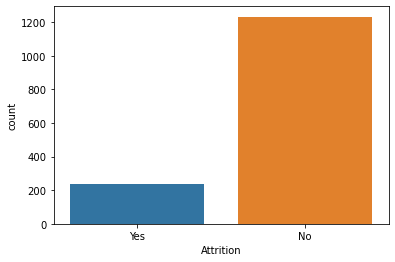

In [20]:
sns.countplot(df1['Attrition'])

Target variable is imbalanced.

In [21]:
df1['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

For Yes attrition we have 237 counts, for No attrition we have 1233 counts.

<AxesSubplot:xlabel='Gender', ylabel='count'>

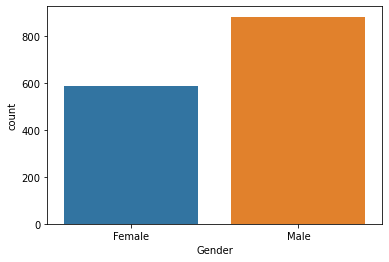

In [22]:
sns.countplot(df1['Gender'])

In [23]:
df1['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

Here we are seeing that male employees counts are 882, female employees counts are 588.

<AxesSubplot:xlabel='OverTime', ylabel='count'>

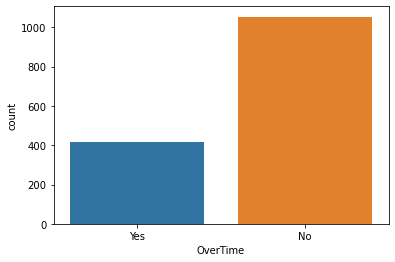

In [24]:
sns.countplot(df1['OverTime'])

In [25]:
df1['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

For the overtime column yes count is 416, No count is 1054.

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

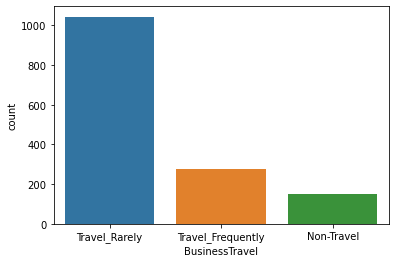

In [26]:
sns.countplot(df1['BusinessTravel'])

In [27]:
df1['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

For the above column, Travel_Rarely count is 1043, Travel_Frequently count is 277, Non_Travel count is 150.

<AxesSubplot:xlabel='Department', ylabel='count'>

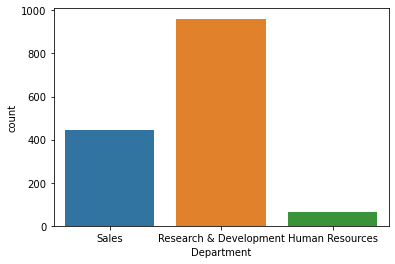

In [28]:
sns.countplot(df1['Department'])

In [29]:
df1['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

For the Department column Research and Development count is 961, Sales count is 446, Human Resources count is 63.

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

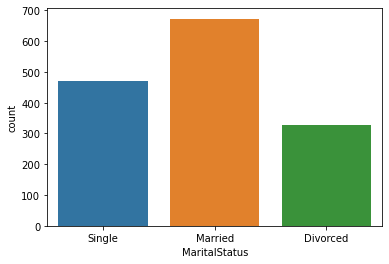

In [30]:
sns.countplot(df1['MaritalStatus'])

In [31]:
df1['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

<AxesSubplot:xlabel='EducationField', ylabel='count'>

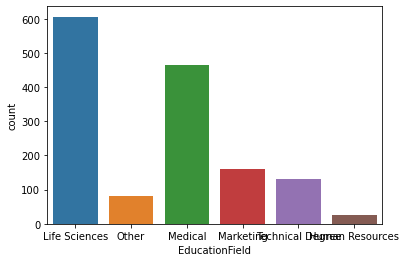

In [32]:
sns.countplot(df1['EducationField'])

In [33]:
df1['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

<AxesSubplot:xlabel='JobRole', ylabel='count'>

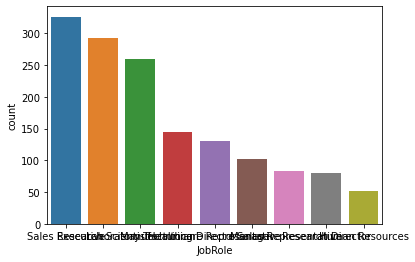

In [34]:
sns.countplot(df1['JobRole'])

In [35]:
df1['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

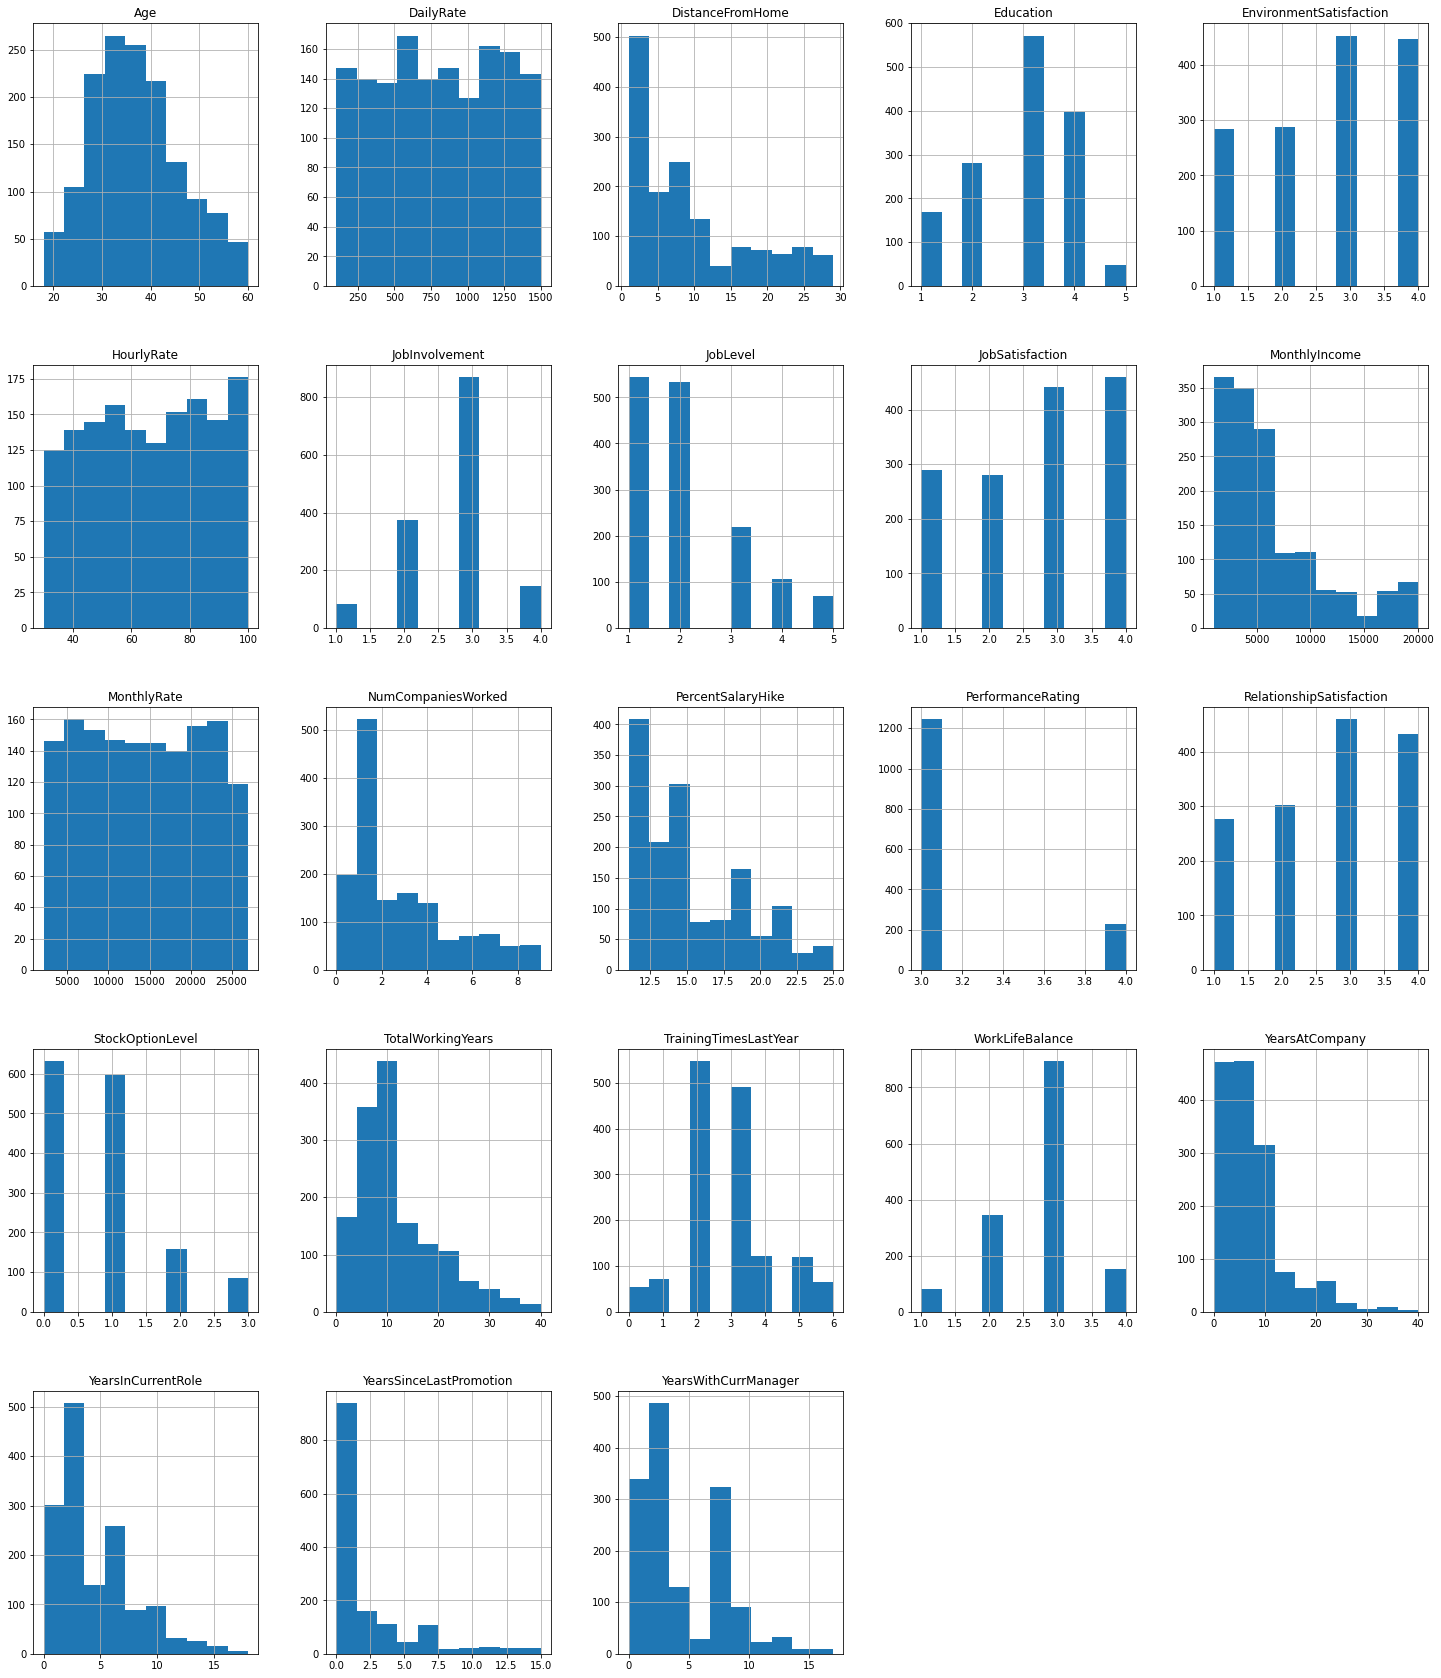

In [36]:
df1.hist(figsize=(25,30))
plt.show()

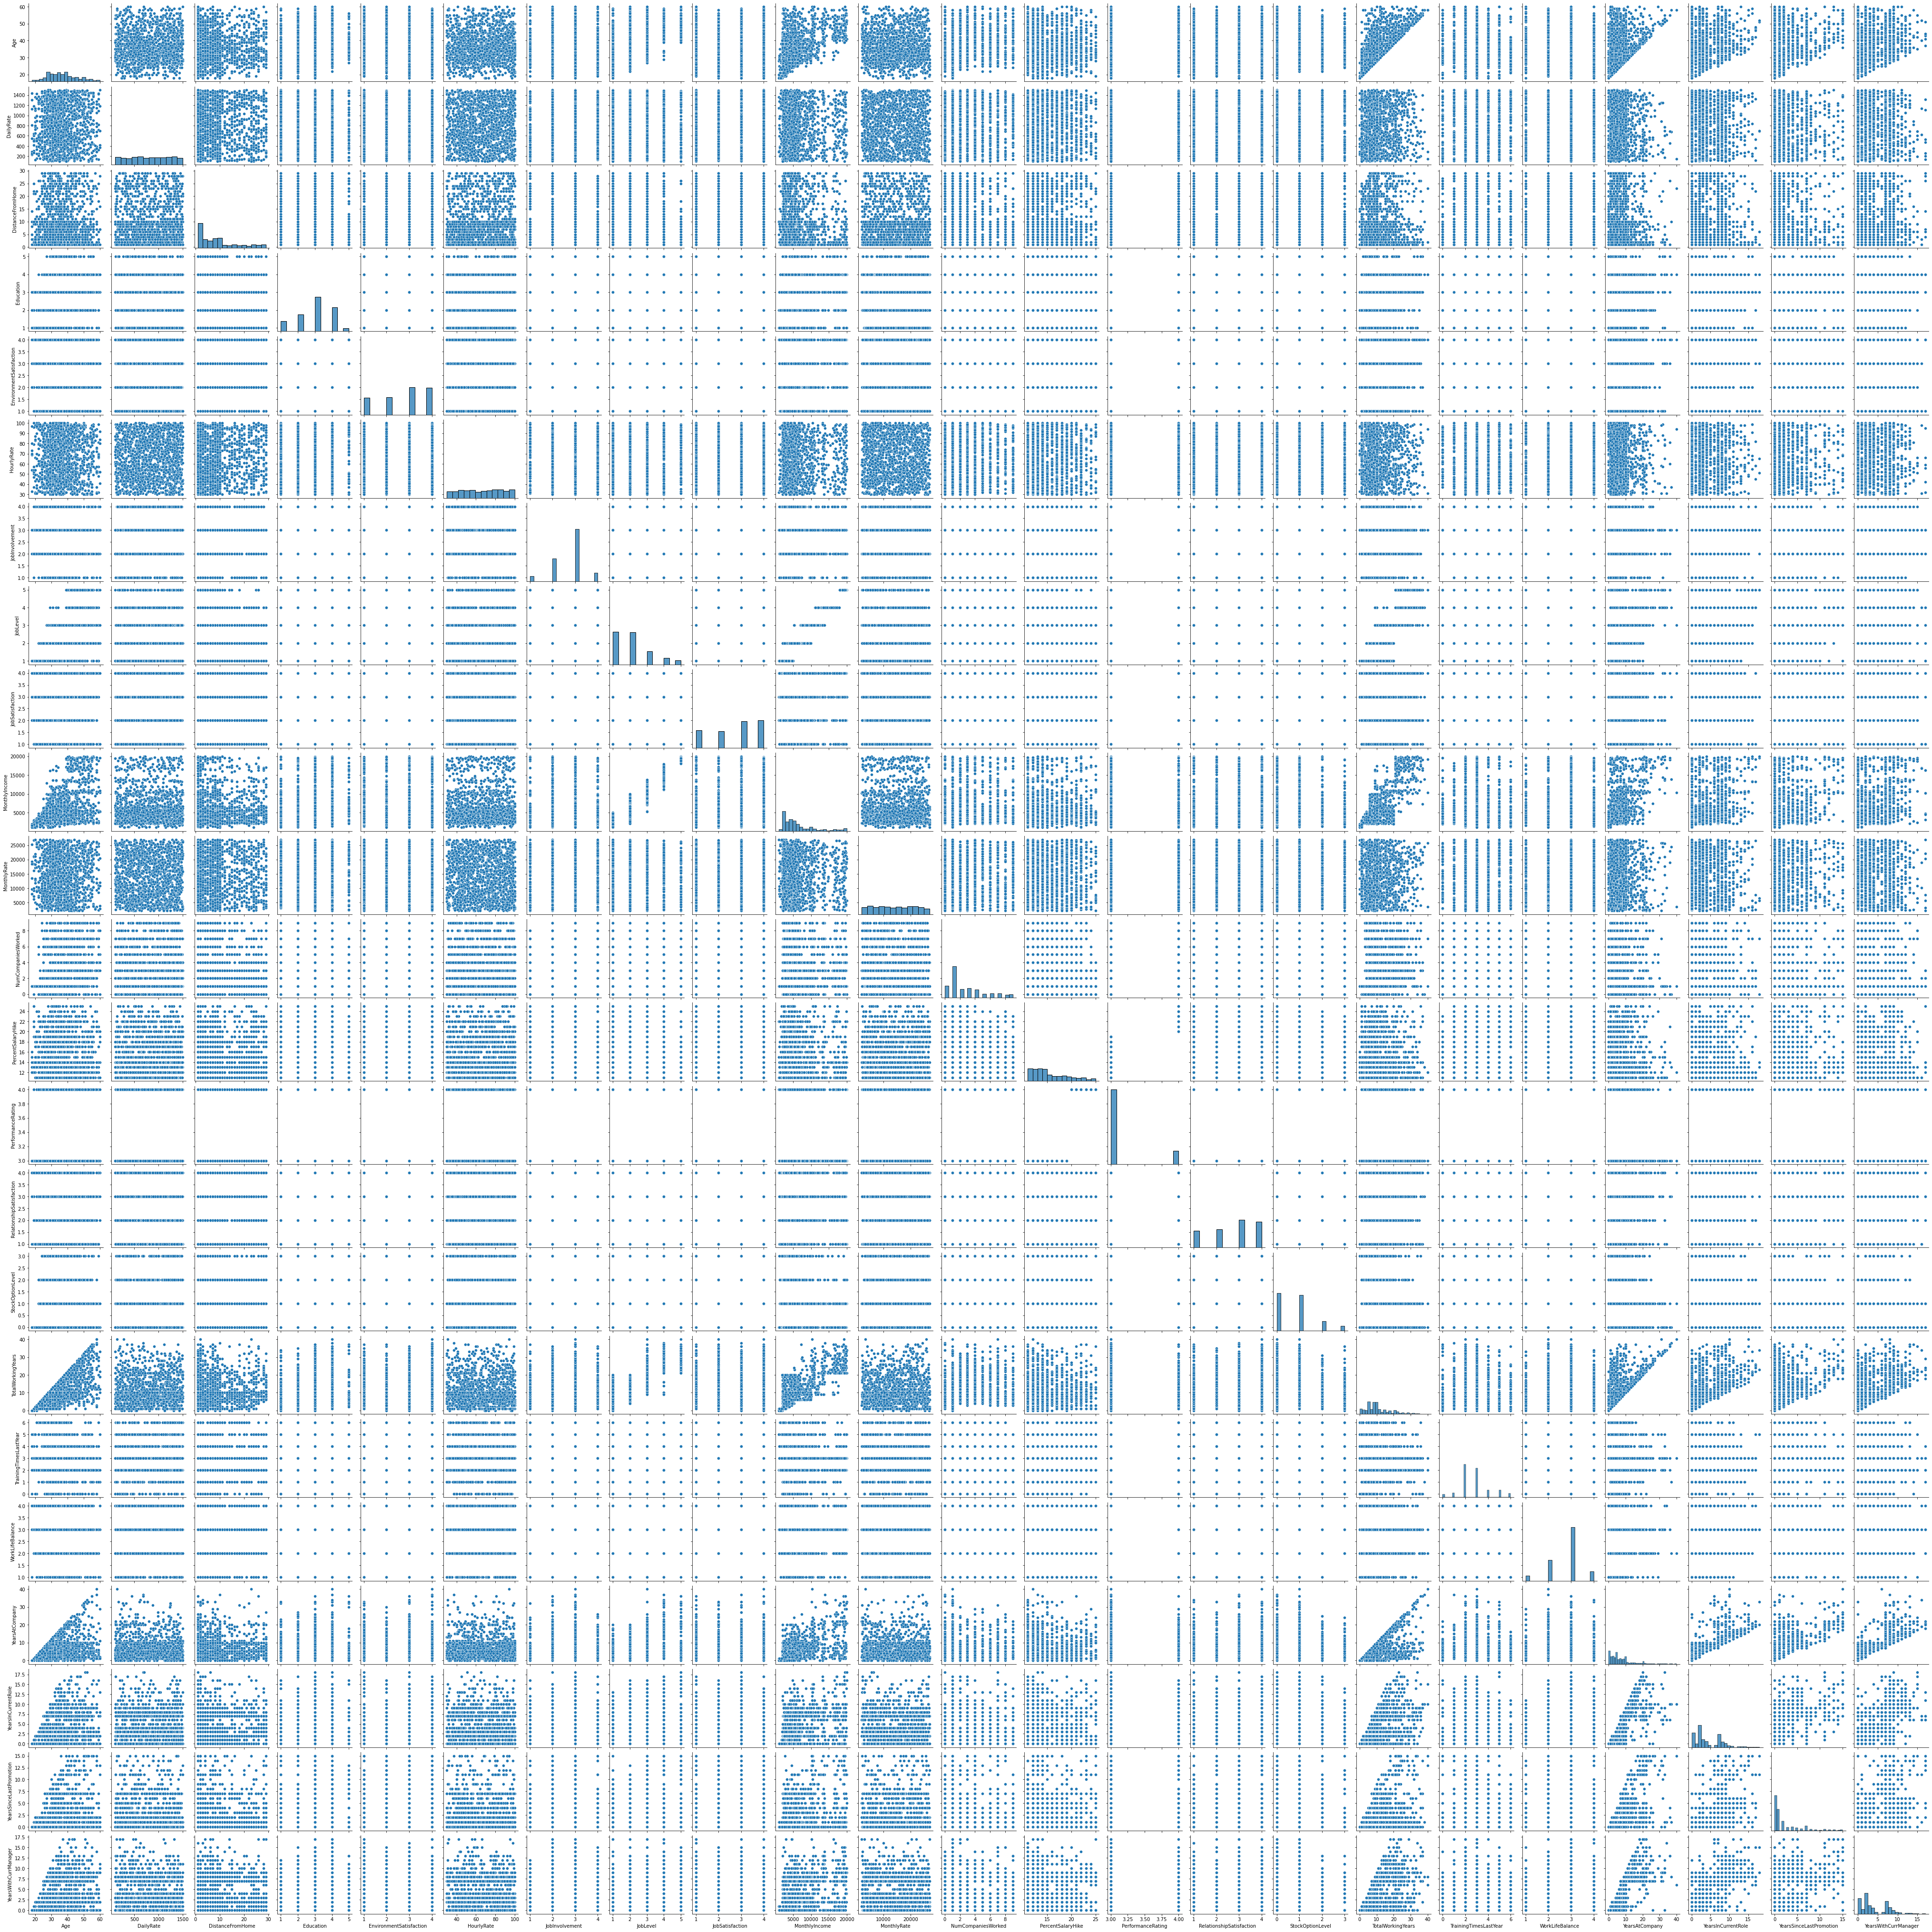

In [37]:
sns.pairplot(df1)

# Encoding

In [38]:
df1.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

We have 8 object type columns including Target variable. Attrition, BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, OverTime.

We must encode all the categorical datas to integer type.

Label Encoder

In [39]:
le=LabelEncoder()
df1['Attrition']=le.fit_transform(df1['Attrition'])
df1

Age  Attrition     BusinessTravel  DailyRate              Department  \
0      41          1      Travel_Rarely       1102                   Sales   
1      49          0  Travel_Frequently        279  Research & Development   
2      37          1      Travel_Rarely       1373  Research & Development   
3      33          0  Travel_Frequently       1392  Research & Development   
4      27          0      Travel_Rarely        591  Research & Development   
...   ...        ...                ...        ...                     ...   
1465   36          0  Travel_Frequently        884  Research & Development   
1466   39          0      Travel_Rarely        613  Research & Development   
1467   27          0      Travel_Rarely        155  Research & Development   
1468   49          0  Travel_Frequently       1023                   Sales   
1469   34          0      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                    1          2  Life Sciences                        2   
1                    8          1  Life Sciences                        3   
2                    2          2          Other                        4   
3                    3          4  Life Sciences                        4   
4                    2          1        Medical                        1   
...                ...        ...            ...                      ...   
1465                23          2        Medical                        3   
1466                 6          1        Medical                        4   
1467                 4          3  Life Sciences                        2   
1468                 2          3        Medical                        4   
1469                 8          3        Medical                        2   

      Gender  ...  PerformanceRating  RelationshipSatisfaction  \
0     Female  ...                  3                         1   
1       Male  ...                  4                         4   
2       Male  ...                  3                         2   
3     Female  ...                  3                         3   
4       Male  ...                  3                         4   
...      ...  ...                ...                       ...   
1465    Male  ...                  3                         3   
1466    Male  ...                  3                         1   
1467    Male  ...                  4                         2   
1468    Male  ...                  3                         4   
1469    Male  ...                  3                         1   

      StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  \
0                    0                 8                      0   
1                    1                10                      3   
2                    0                 7                      3   
3                    0                 8                      3   
4                    1                 6                      3   
...                ...               ...                    ...   
1465                 1                17                      3   
1466                 1                 9                      5   
1467                 1                 6                      0   
1468                 0                17                      3   
1469                 0                 6                      3   

     WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                  1               6                   4   
1                  3              10                   7   
2                  3               0                   0   
3                  3               8                   7   
4                  3               2                   2   
...              ...             ...                 ...   
1465               3               5                   2   
1466               3               7                   7   
1467  

In [41]:
le=LabelEncoder()
df1['BusinessTravel']=le.fit_transform(df1['BusinessTravel'])
df1

Age  Attrition  BusinessTravel  DailyRate              Department  \
0      41          1               2       1102                   Sales   
1      49          0               1        279  Research & Development   
2      37          1               2       1373  Research & Development   
3      33          0               1       1392  Research & Development   
4      27          0               2        591  Research & Development   
...   ...        ...             ...        ...                     ...   
1465   36          0               1        884  Research & Development   
1466   39          0               2        613  Research & Development   
1467   27          0               2        155  Research & Development   
1468   49          0               1       1023                   Sales   
1469   34          0               2        628  Research & Development   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                    1          2  Life Sciences                        2   
1                    8          1  Life Sciences                        3   
2                    2          2          Other                        4   
3                    3          4  Life Sciences                        4   
4                    2          1        Medical                        1   
...                ...        ...            ...                      ...   
1465                23          2        Medical                        3   
1466                 6          1        Medical                        4   
1467                 4          3  Life Sciences                        2   
1468                 2          3        Medical                        4   
1469                 8          3        Medical                        2   

      Gender  ...  PerformanceRating  RelationshipSatisfaction  \
0     Female  ...                  3                         1   
1       Male  ...                  4                         4   
2       Male  ...                  3                         2   
3     Female  ...                  3                         3   
4       Male  ...                  3                         4   
...      ...  ...                ...                       ...   
1465    Male  ...                  3                         3   
1466    Male  ...                  3                         1   
1467    Male  ...                  4                         2   
1468    Male  ...                  3                         4   
1469    Male  ...                  3                         1   

      StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  \
0                    0                 8                      0   
1                    1                10                      3   
2                    0                 7                      3   
3                    0                 8                      3   
4                    1                 6                      3   
...                ...               ...                    ...   
1465                 1                17                      3   
1466                 1                 9                      5   
1467                 1                 6                      0   
1468                 0                17                      3   
1469                 0                 6                      3   

     WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                  1               6                   4   
1                  3              10                   7   
2                  3               0                   0   
3                  3               8                   7   
4                  3               2                   2   
...              ...             ...                 ...   
1465               3               5                   2   
1466               3               7                   7   
1467               3               6      

In [42]:
le=LabelEncoder()
df1['Department']=le.fit_transform(df1['Department'])
df1

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41          1               2       1102           2                 1   
1      49          0               1        279           1                 8   
2      37          1               2       1373           1                 2   
3      33          0               1       1392           1                 3   
4      27          0               2        591           1                 2   
...   ...        ...             ...        ...         ...               ...   
1465   36          0               1        884           1                23   
1466   39          0               2        613           1                 6   
1467   27          0               2        155           1                 4   
1468   49          0               1       1023           2                 2   
1469   34          0               2        628           1                 8   

      Education EducationField  EnvironmentSatisfaction  Gender  ...  \
0             2  Life Sciences                        2  Female  ...   
1             1  Life Sciences                        3    Male  ...   
2             2          Other                        4    Male  ...   
3             4  Life Sciences                        4  Female  ...   
4             1        Medical                        1    Male  ...   
...         ...            ...                      ...     ...  ...   
1465          2        Medical                        3    Male  ...   
1466          1        Medical                        4    Male  ...   
1467          3  Life Sciences                        2    Male  ...   
1468          3        Medical                        4    Male  ...   
1469          3        Medical                        2    Male  ...   

      PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                     3                         1                 0   
1                     4                         4                 1   
2                     3                         2                 0   
3                     3                         3                 0   
4                     3                         4                 1   
...                 ...                       ...               ...   
1465                  3                         3                 1   
1466                  3                         1                 1   
1467                  4                         2                 1   
1468                  3                         4                 0   
1469                  3                         1                 0   

     TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                    8                      0               1               6   
1                   10                      3               3              10   
2                    7                      3               3               0   
3                    8                      3               3               8   
4                    6                      3               3               2   
...                ...                    ...             ...             ...   
1465                17                      3               3               5   
1466                 9                      5               3               7   
1467                 6                      0               3               6   
1468                17                      3               2               9   
1469                 6                      3               4               4   

      YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                      4                        0                    5  
1                      7                        1                    7  
2                      0                        0                    0  
3                      7                        3 

In [43]:
le=LabelEncoder()
df1['EducationField']=le.fit_transform(df1['EducationField'])
df1

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41          1               2       1102           2                 1   
1      49          0               1        279           1                 8   
2      37          1               2       1373           1                 2   
3      33          0               1       1392           1                 3   
4      27          0               2        591           1                 2   
...   ...        ...             ...        ...         ...               ...   
1465   36          0               1        884           1                23   
1466   39          0               2        613           1                 6   
1467   27          0               2        155           1                 4   
1468   49          0               1       1023           2                 2   
1469   34          0               2        628           1                 8   

      Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0             2               1                        2  Female  ...   
1             1               1                        3    Male  ...   
2             2               4                        4    Male  ...   
3             4               1                        4  Female  ...   
4             1               3                        1    Male  ...   
...         ...             ...                      ...     ...  ...   
1465          2               3                        3    Male  ...   
1466          1               3                        4    Male  ...   
1467          3               1                        2    Male  ...   
1468          3               3                        4    Male  ...   
1469          3               3                        2    Male  ...   

      PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                     3                         1                 0   
1                     4                         4                 1   
2                     3                         2                 0   
3                     3                         3                 0   
4                     3                         4                 1   
...                 ...                       ...               ...   
1465                  3                         3                 1   
1466                  3                         1                 1   
1467                  4                         2                 1   
1468                  3                         4                 0   
1469                  3                         1                 0   

     TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                    8                      0               1               6   
1                   10                      3               3              10   
2                    7                      3               3               0   
3                    8                      3               3               8   
4                    6                      3               3               2   
...                ...                    ...             ...             ...   
1465                17                      3               3               5   
1466                 9                      5               3               7   
1467                 6                      0               3               6   
1468                17                      3               2               9   
1469                 6                      3               4               4   

      YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                      4                        0                    5  
1                      7                        1                    7  
2                      0                        0                    0  
3                      7              

In [44]:
le=LabelEncoder()
df1['Gender']=le.fit_transform(df1['Gender'])
df1

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41          1               2       1102           2                 1   
1      49          0               1        279           1                 8   
2      37          1               2       1373           1                 2   
3      33          0               1       1392           1                 3   
4      27          0               2        591           1                 2   
...   ...        ...             ...        ...         ...               ...   
1465   36          0               1        884           1                23   
1466   39          0               2        613           1                 6   
1467   27          0               2        155           1                 4   
1468   49          0               1       1023           2                 2   
1469   34          0               2        628           1                 8   

      Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0             2               1                        2       0  ...   
1             1               1                        3       1  ...   
2             2               4                        4       1  ...   
3             4               1                        4       0  ...   
4             1               3                        1       1  ...   
...         ...             ...                      ...     ...  ...   
1465          2               3                        3       1  ...   
1466          1               3                        4       1  ...   
1467          3               1                        2       1  ...   
1468          3               3                        4       1  ...   
1469          3               3                        2       1  ...   

      PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                     3                         1                 0   
1                     4                         4                 1   
2                     3                         2                 0   
3                     3                         3                 0   
4                     3                         4                 1   
...                 ...                       ...               ...   
1465                  3                         3                 1   
1466                  3                         1                 1   
1467                  4                         2                 1   
1468                  3                         4                 0   
1469                  3                         1                 0   

     TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                    8                      0               1               6   
1                   10                      3               3              10   
2                    7                      3               3               0   
3                    8                      3               3               8   
4                    6                      3               3               2   
...                ...                    ...             ...             ...   
1465                17                      3               3               5   
1466                 9                      5               3               7   
1467                 6                      0               3               6   
1468                17                      3               2               9   
1469                 6                      3               4               4   

      YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                      4                        0                    5  
1                      7                        1                    7  
2                      0                        0                    0  
3                      7              

In [45]:
le=LabelEncoder()
df1['JobRole']=le.fit_transform(df1['JobRole'])
df1

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41          1               2       1102           2                 1   
1      49          0               1        279           1                 8   
2      37          1               2       1373           1                 2   
3      33          0               1       1392           1                 3   
4      27          0               2        591           1                 2   
...   ...        ...             ...        ...         ...               ...   
1465   36          0               1        884           1                23   
1466   39          0               2        613           1                 6   
1467   27          0               2        155           1                 4   
1468   49          0               1       1023           2                 2   
1469   34          0               2        628           1                 8   

      Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0             2               1                        2       0  ...   
1             1               1                        3       1  ...   
2             2               4                        4       1  ...   
3             4               1                        4       0  ...   
4             1               3                        1       1  ...   
...         ...             ...                      ...     ...  ...   
1465          2               3                        3       1  ...   
1466          1               3                        4       1  ...   
1467          3               1                        2       1  ...   
1468          3               3                        4       1  ...   
1469          3               3                        2       1  ...   

      PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                     3                         1                 0   
1                     4                         4                 1   
2                     3                         2                 0   
3                     3                         3                 0   
4                     3                         4                 1   
...                 ...                       ...               ...   
1465                  3                         3                 1   
1466                  3                         1                 1   
1467                  4                         2                 1   
1468                  3                         4                 0   
1469                  3                         1                 0   

      TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  \
0                     8                      0               1   
1                    10                      3               3   
2                     7                      3               3   
3                     8                      3               3   
4                     6                      3               3   
...                 ...                    ...             ...   
1465                 17                      3               3   
1466                  9                      5               3   
1467                  6                      0               3   
1468                 17                      3               2   
1469                  6                      3               4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                        2   
...              ...                 ...                      ...   
1465               5       

In [46]:
le=LabelEncoder()
df1['MaritalStatus']=le.fit_transform(df1['MaritalStatus'])
df1

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41          1               2       1102           2                 1   
1      49          0               1        279           1                 8   
2      37          1               2       1373           1                 2   
3      33          0               1       1392           1                 3   
4      27          0               2        591           1                 2   
...   ...        ...             ...        ...         ...               ...   
1465   36          0               1        884           1                23   
1466   39          0               2        613           1                 6   
1467   27          0               2        155           1                 4   
1468   49          0               1       1023           2                 2   
1469   34          0               2        628           1                 8   

      Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0             2               1                        2       0  ...   
1             1               1                        3       1  ...   
2             2               4                        4       1  ...   
3             4               1                        4       0  ...   
4             1               3                        1       1  ...   
...         ...             ...                      ...     ...  ...   
1465          2               3                        3       1  ...   
1466          1               3                        4       1  ...   
1467          3               1                        2       1  ...   
1468          3               3                        4       1  ...   
1469          3               3                        2       1  ...   

      PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                     3                         1                 0   
1                     4                         4                 1   
2                     3                         2                 0   
3                     3                         3                 0   
4                     3                         4                 1   
...                 ...                       ...               ...   
1465                  3                         3                 1   
1466                  3                         1                 1   
1467                  4                         2                 1   
1468                  3                         4                 0   
1469                  3                         1                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1465                 17                      3                3   
1466                  9                      5                3   
1467                  6                      0                3   
1468                 17                      3                2   
1469                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                        2   
...              ...                 ...                      ...   
1465           

In [47]:
le=LabelEncoder()
df1['OverTime']=le.fit_transform(df1['OverTime'])
df1

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41          1               2       1102           2                 1   
1      49          0               1        279           1                 8   
2      37          1               2       1373           1                 2   
3      33          0               1       1392           1                 3   
4      27          0               2        591           1                 2   
...   ...        ...             ...        ...         ...               ...   
1465   36          0               1        884           1                23   
1466   39          0               2        613           1                 6   
1467   27          0               2        155           1                 4   
1468   49          0               1       1023           2                 2   
1469   34          0               2        628           1                 8   

      Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0             2               1                        2       0  ...   
1             1               1                        3       1  ...   
2             2               4                        4       1  ...   
3             4               1                        4       0  ...   
4             1               3                        1       1  ...   
...         ...             ...                      ...     ...  ...   
1465          2               3                        3       1  ...   
1466          1               3                        4       1  ...   
1467          3               1                        2       1  ...   
1468          3               3                        4       1  ...   
1469          3               3                        2       1  ...   

      PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                     3                         1                 0   
1                     4                         4                 1   
2                     3                         2                 0   
3                     3                         3                 0   
4                     3                         4                 1   
...                 ...                       ...               ...   
1465                  3                         3                 1   
1466                  3                         1                 1   
1467                  4                         2                 1   
1468                  3                         4                 0   
1469                  3                         1                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1465                 17                      3                3   
1466                  9                      5                3   
1467                  6                      0                3   
1468                 17                      3                2   
1469                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                        2   
...              ...                 ...                      ...   
1465           

In [48]:
df1.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLast

We encoded all the categorical values to integer type.

# Correlation

In [49]:
df1.corr()

Age  Attrition  BusinessTravel  DailyRate  \
Age                       1.000000  -0.159205        0.024751   0.010661   
Attrition                -0.159205   1.000000        0.000074  -0.056652   
BusinessTravel            0.024751   0.000074        1.000000  -0.004086   
DailyRate                 0.010661  -0.056652       -0.004086   1.000000   
Department               -0.031882   0.063991       -0.009044   0.007109   
DistanceFromHome         -0.001686   0.077924       -0.024469  -0.004985   
Education                 0.208034  -0.031373        0.000757  -0.016806   
EducationField           -0.040873   0.026846        0.023724   0.037709   
EnvironmentSatisfaction   0.010146  -0.103369        0.004174   0.018355   
Gender                   -0.036311   0.029453       -0.032981  -0.011716   
HourlyRate                0.024287  -0.006846        0.026528   0.023381   
JobInvolvement            0.029820  -0.130016        0.039062   0.046135   
JobLevel                  0.509604  -0.169105        0.019311   0.002966   
JobRole                  -0.122427   0.067151        0.002724  -0.009472   
JobSatisfaction          -0.004892  -0.103481       -0.033962   0.030571   
MaritalStatus            -0.095029   0.162070        0.024001  -0.069586   
MonthlyIncome             0.497855  -0.159840        0.034319   0.007707   
MonthlyRate               0.028051   0.015170       -0.014107  -0.032182   
NumCompaniesWorked        0.299635   0.043494        0.020875   0.038153   
OverTime                  0.028062   0.246118        0.016543   0.009135   
PercentSalaryHike         0.003634  -0.013478       -0.029377   0.022704   
PerformanceRating         0.001904   0.002889       -0.026341   0.000473   
RelationshipSatisfaction  0.053535  -0.045872       -0.035986   0.007846   
StockOptionLevel          0.037510  -0.137145       -0.016727   0.042143   
TotalWorkingYears         0.680381  -0.171063        0.034226   0.014515   
TrainingTimesLastYear    -0.019621  -0.059478        0.015240   0.002453   
WorkLifeBalance          -0.021490  -0.063939       -0.011256  -0.037848   
YearsAtCompany            0.311309  -0.134392       -0.014575  -0.034055   
YearsInCurrentRole        0.212901  -0.160545       -0.011497   0.009932   
YearsSinceLastPromotion   0.216513  -0.033019       -0.032591  -0.033229   
YearsWithCurrManager      0.202089  -0.156199       -0.022636  -0.026363   

                          Department  DistanceFromHome  Education  \
Age                        -0.031882         -0.001686   0.208034   
Attrition                   0.063991          0.077924  -0.031373   
BusinessTravel             -0.009044         -0.024469   0.000757   
DailyRate                   0.007109         -0.004985  -0.016806   
Department                  1.000000          0.017225   0.007996   
DistanceFromHome            0.017225          1.000000   0.021042   
Education                   0.007996          0.021042   1.000000   
EducationField              0.013720          0.002013  -0.039592   
EnvironmentSatisfaction    -0.019395         -0.016075  -0.027128   
Gender                     -0.041583         -0.001851  -0.016547   
HourlyRate                 -0.004144          0.031131   0.016775   
JobInvolvement             -0.024586          0.008783   0.042438   
JobLevel                    0.101963          0.005303   0.101589   
JobRole                     0.662431         -0.001015   0.004236   
JobSatisfaction             0.021001         -0.003669  -0.011296   
MaritalStatus               0.056073         -0.014437   0.004053   
MonthlyIncome               0.053130         -0.017014   0.094961   
MonthlyRate                 0.023642          0.027473  -0.026084   
NumCompaniesWorked         -0.035882         -0.029251   0.126317   
OverTime                    0.007481          0.025514  -0.020322   
PercentSalaryHike          -0.007840          0.040235  -0.011111   
PerformanceRating          -0.024604          0.027110  -0.024539   
Relationshi

<AxesSubplot:>

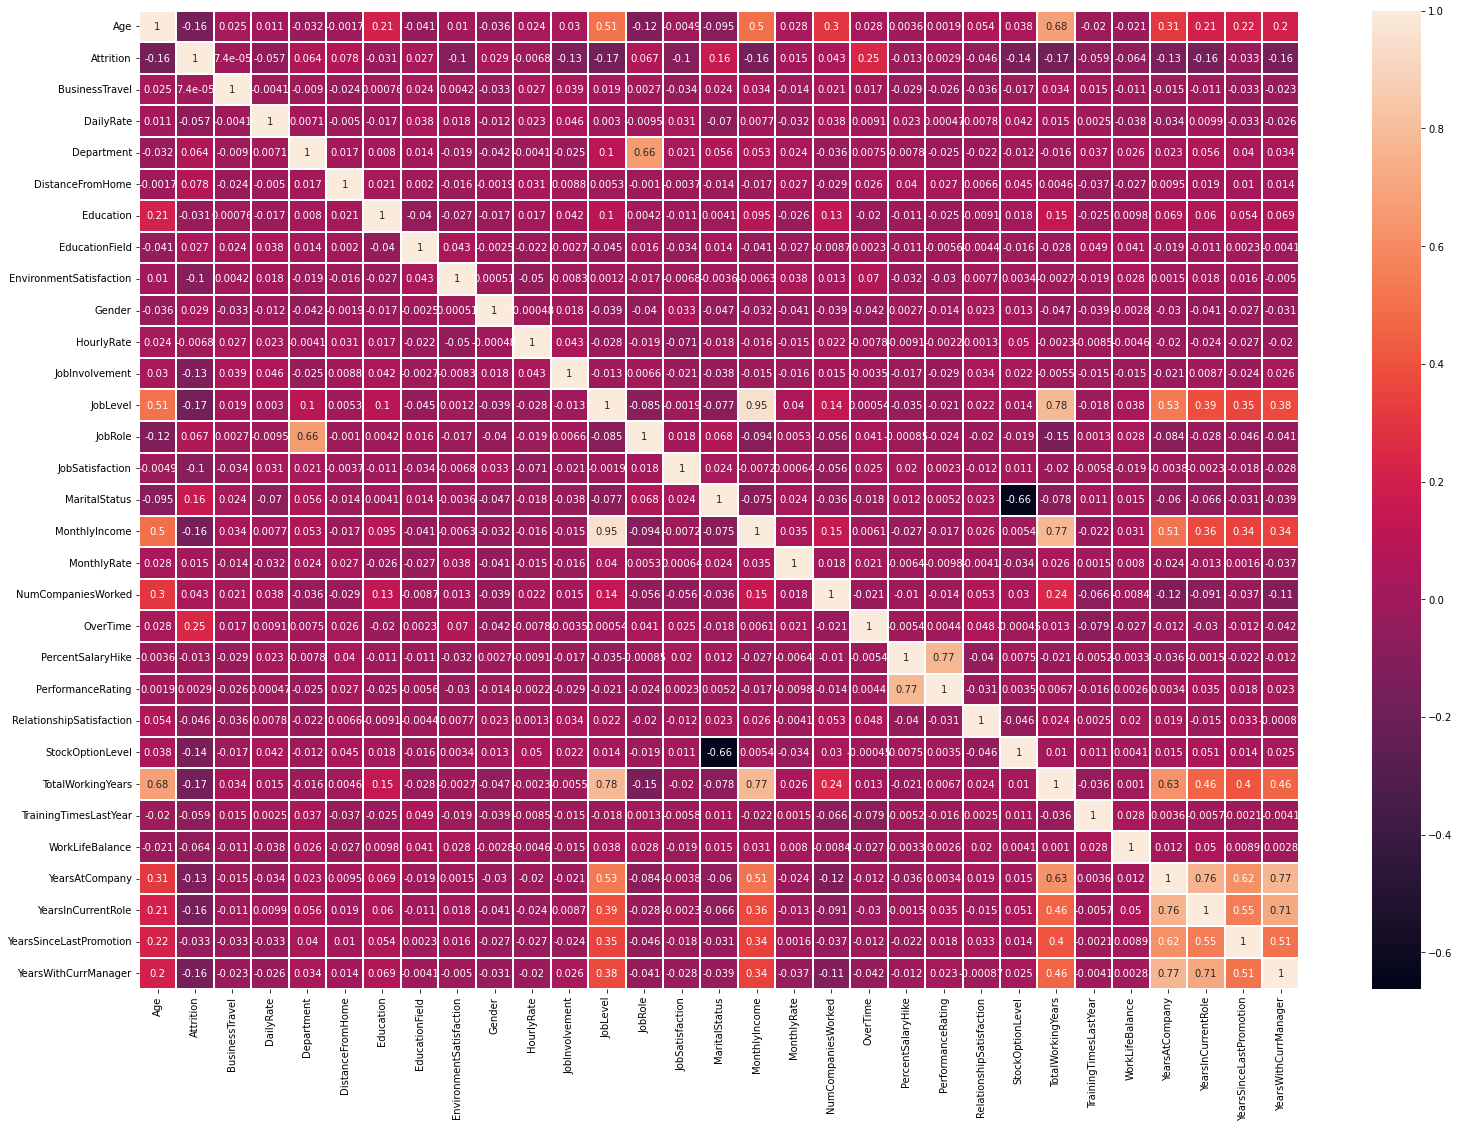

In [50]:
plt.figure(figsize=(26,18))
sns.heatmap(df1.corr(),linewidths=.1,annot=True)

Dataset contains both positive and negative correlation. Lighter colors mentions positive correlated input variables with target variable 'Attrition'. Darker colors mentions negative correlation with 'Attrition'. 

MonthlyIncome and JobRole have high positive correlation with target variable.

YearsAtCompany also have positive correlation with Attrition.

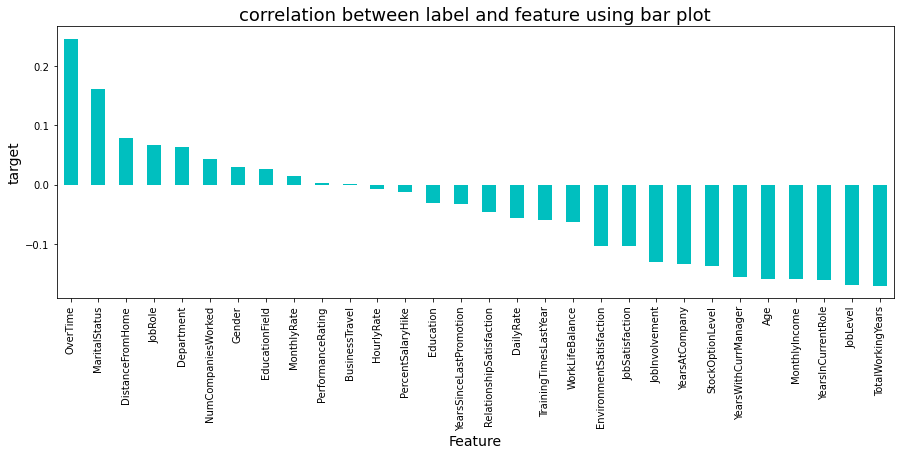

In [51]:
plt.figure(figsize=(15,5))
df1.corr()['Attrition'].sort_values(ascending=False).drop(['Attrition']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()

The above plot shows which input variables are positively correlated and negatively correlated.

# Outliers Check

In [52]:
df1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [53]:
df1.shape

(1470, 31)

<AxesSubplot:>

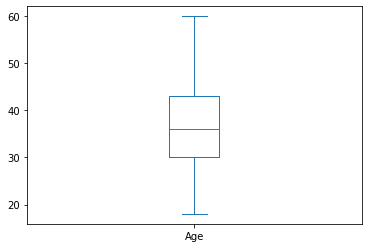

In [54]:
df1['Age'].plot.box()

<AxesSubplot:>

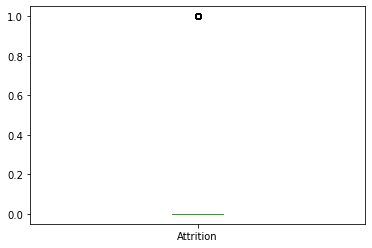

In [55]:
df1['Attrition'].plot.box()

Outliers are present in Target Variable.

<AxesSubplot:>

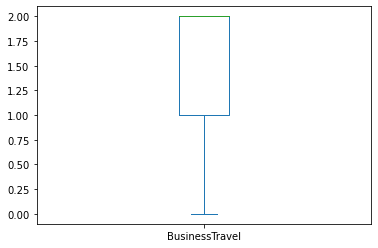

In [56]:
df1['BusinessTravel'].plot.box()

<AxesSubplot:>

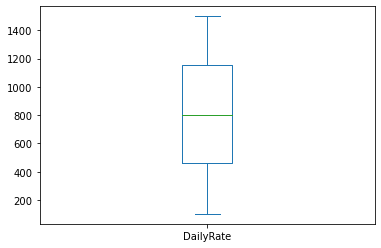

In [57]:
df1['DailyRate'].plot.box()

<AxesSubplot:>

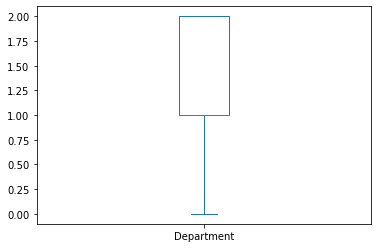

In [58]:
df1['Department'].plot.box()

<AxesSubplot:>

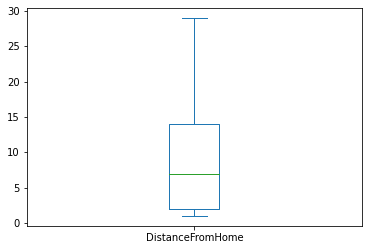

In [59]:
df1['DistanceFromHome'].plot.box()

<AxesSubplot:>

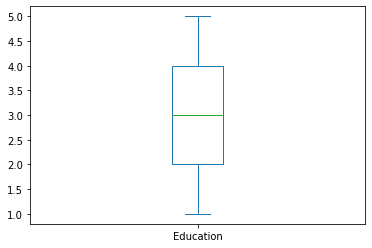

In [60]:
df1['Education'].plot.box()

<AxesSubplot:>

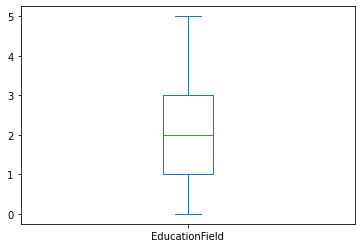

In [61]:
df1['EducationField'].plot.box()

<AxesSubplot:>

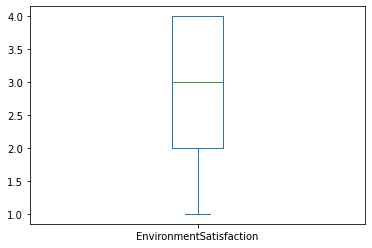

In [62]:
df1['EnvironmentSatisfaction'].plot.box()

<AxesSubplot:>

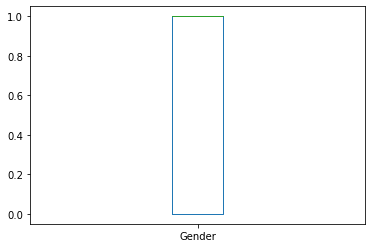

In [63]:
df1['Gender'].plot.box()

<AxesSubplot:>

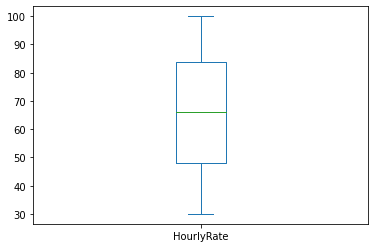

In [64]:
df1['HourlyRate'].plot.box()

<AxesSubplot:>

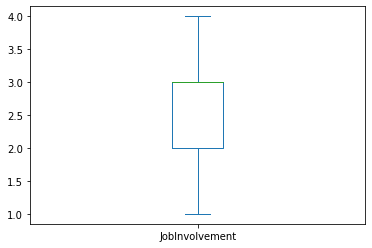

In [65]:
df1['JobInvolvement'].plot.box()

<AxesSubplot:>

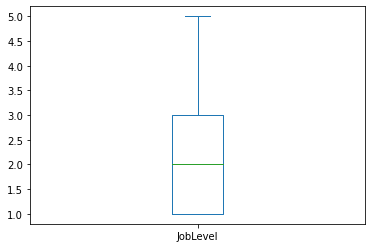

In [66]:
df1['JobLevel'].plot.box()

<AxesSubplot:>

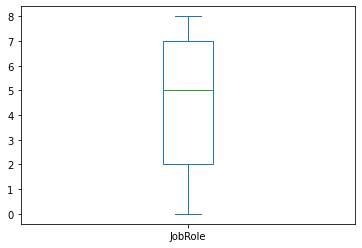

In [67]:
df1['JobRole'].plot.box()

<AxesSubplot:>

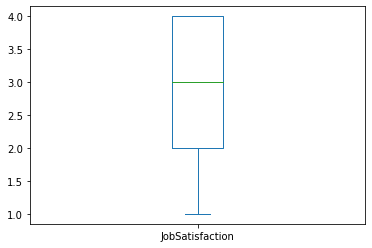

In [68]:
df1['JobSatisfaction'].plot.box()

<AxesSubplot:>

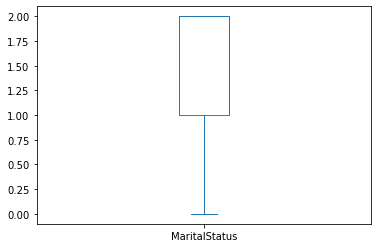

In [69]:
df1['MaritalStatus'].plot.box()

<AxesSubplot:>

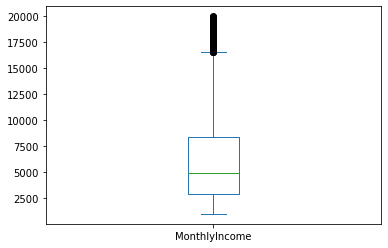

In [70]:
df1['MonthlyIncome'].plot.box()

Outliers are present in MonthlyIncome column.

<AxesSubplot:>

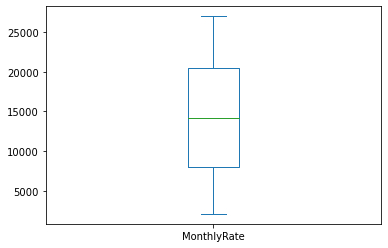

In [71]:
df1['MonthlyRate'].plot.box()

<AxesSubplot:>

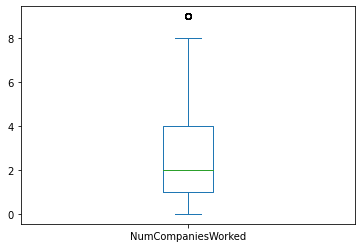

In [72]:
df1['NumCompaniesWorked'].plot.box()

Outliers are present in the above column.

<AxesSubplot:>

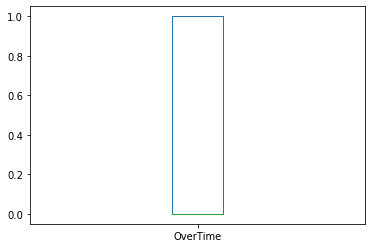

In [73]:
df1['OverTime'].plot.box()

<AxesSubplot:>

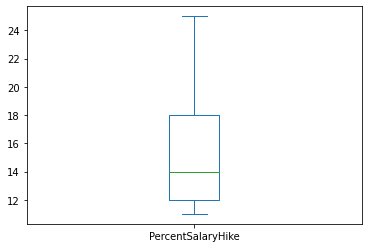

In [74]:
df1['PercentSalaryHike'].plot.box()

<AxesSubplot:>

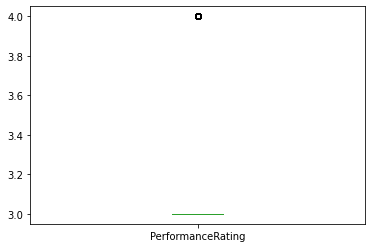

In [75]:
df1['PerformanceRating'].plot.box()

Outliers are present in the PerformanceRating Column.

<AxesSubplot:>

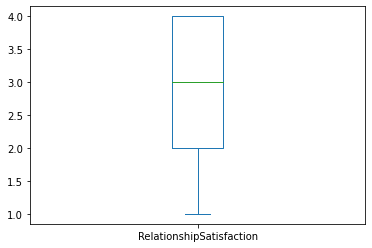

In [76]:
df1['RelationshipSatisfaction'].plot.box()

<AxesSubplot:>

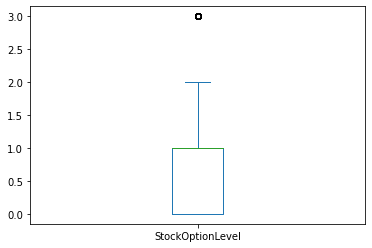

In [77]:
df1['StockOptionLevel'].plot.box()

<AxesSubplot:>

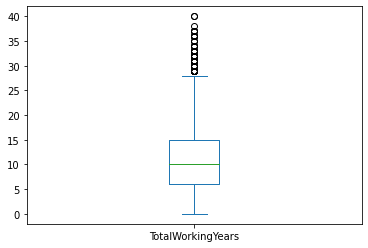

In [78]:
df1['TotalWorkingYears'].plot.box()

<AxesSubplot:>

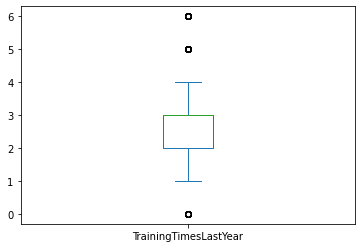

In [79]:
df1['TrainingTimesLastYear'].plot.box()

<AxesSubplot:>

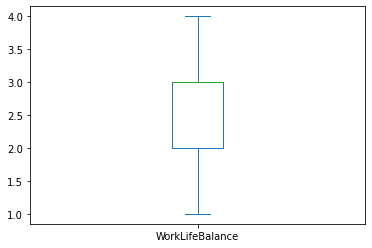

In [80]:
df1['WorkLifeBalance'].plot.box()

<AxesSubplot:>

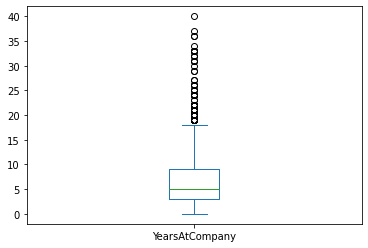

In [81]:
df1['YearsAtCompany'].plot.box()

<AxesSubplot:>

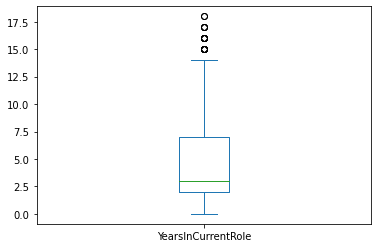

In [82]:
df1['YearsInCurrentRole'].plot.box()

<AxesSubplot:>

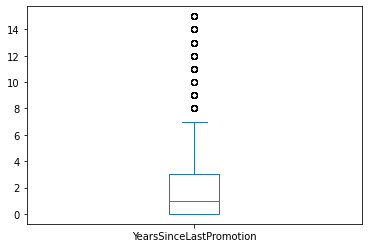

In [83]:
df1['YearsSinceLastPromotion'].plot.box()

<AxesSubplot:>

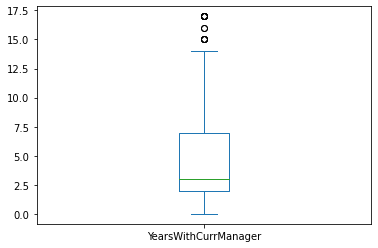

In [84]:
df1['YearsWithCurrManager'].plot.box()

# Removing Outliers

In [85]:
from scipy.stats import zscore

df1zscore=np.abs(zscore(df1))
print(np.where(df1zscore>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([30, 29, 27, 29, 28, 29, 24, 24, 27, 29, 28, 29, 30, 24, 27, 29, 30,
       29, 24, 30, 27, 28, 29, 28, 30, 27, 29, 24, 27, 28, 29, 29, 30, 24,
       27, 27, 29, 29, 24, 28, 27, 27, 29, 27, 30, 29, 27, 24, 27, 29, 30,
       24, 30, 27, 29, 

In [86]:
df1new=df1[(df1zscore<3).all(axis=1)]
print('df1new.shape=',df1new.shape)

df1=df1new

df1new.shape= (1387, 31)


In [87]:
df1

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41          1               2       1102           2                 1   
1      49          0               1        279           1                 8   
2      37          1               2       1373           1                 2   
3      33          0               1       1392           1                 3   
4      27          0               2        591           1                 2   
...   ...        ...             ...        ...         ...               ...   
1465   36          0               1        884           1                23   
1466   39          0               2        613           1                 6   
1467   27          0               2        155           1                 4   
1468   49          0               1       1023           2                 2   
1469   34          0               2        628           1                 8   

      Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0             2               1                        2       0  ...   
1             1               1                        3       1  ...   
2             2               4                        4       1  ...   
3             4               1                        4       0  ...   
4             1               3                        1       1  ...   
...         ...             ...                      ...     ...  ...   
1465          2               3                        3       1  ...   
1466          1               3                        4       1  ...   
1467          3               1                        2       1  ...   
1468          3               3                        4       1  ...   
1469          3               3                        2       1  ...   

      PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                     3                         1                 0   
1                     4                         4                 1   
2                     3                         2                 0   
3                     3                         3                 0   
4                     3                         4                 1   
...                 ...                       ...               ...   
1465                  3                         3                 1   
1466                  3                         1                 1   
1467                  4                         2                 1   
1468                  3                         4                 0   
1469                  3                         1                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1465                 17                      3                3   
1466                  9                      5                3   
1467                  6                      0                3   
1468                 17                      3                2   
1469                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                        2   
...              ...                 ...                      ...   
1465           

In [88]:
# data loss.

dataloss=(1470-1387)/1470*100
dataloss

5.646258503401361

# Skewness

In [89]:
df1.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

In [90]:
df1.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLast

# Splitting dataset into two parts: Input and Target Variable

In [92]:
x=df1.drop('Attrition', axis=1)
x

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0      41               2       1102           2                 1          2   
1      49               1        279           1                 8          1   
2      37               2       1373           1                 2          2   
3      33               1       1392           1                 3          4   
4      27               2        591           1                 2          1   
...   ...             ...        ...         ...               ...        ...   
1465   36               1        884           1                23          2   
1466   39               2        613           1                 6          1   
1467   27               2        155           1                 4          3   
1468   49               1       1023           2                 2          3   
1469   34               2        628           1                 8          3   

      EducationField  EnvironmentSatisfaction  Gender  HourlyRate  ...  \
0                  1                        2       0          94  ...   
1                  1                        3       1          61  ...   
2                  4                        4       1          92  ...   
3                  1                        4       0          56  ...   
4                  3                        1       1          40  ...   
...              ...                      ...     ...         ...  ...   
1465               3                        3       1          41  ...   
1466               3                        4       1          42  ...   
1467               1                        2       1          87  ...   
1468               3                        4       1          63  ...   
1469               3                        2       1          82  ...   

      PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                     3                         1                 0   
1                     4                         4                 1   
2                     3                         2                 0   
3                     3                         3                 0   
4                     3                         4                 1   
...                 ...                       ...               ...   
1465                  3                         3                 1   
1466                  3                         1                 1   
1467                  4                         2                 1   
1468                  3                         4                 0   
1469                  3                         1                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1465                 17                      3                3   
1466                  9                      5                3   
1467                  6                      0                3   
1468                 17                      3                2   
1469                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                        2   
...              ...                 ...                      ...   
146

In [93]:
y=df1['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1387, dtype: int32

# SMOTE

# !pip install imblearn -- user

pip install imblearn

In [94]:
from imblearn.over_sampling import SMOTE

In [95]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1387, dtype: int32

In [96]:
y.value_counts()

0    1158
1     229
Name: Attrition, dtype: int64

In [97]:
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [99]:
y.value_counts()

1    1158
0    1158
Name: Attrition, dtype: int64

Now we are managed dataset imbalance using SMOTE technique.

# Scaling

In [100]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [101]:
x

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0     0.724848        0.732503   0.847068    1.558413         -1.131215   
1     1.651694       -0.798613  -1.310127   -0.366539         -0.205784   
2     0.261426        0.732503   1.557396   -0.366539         -0.999010   
3    -0.201997       -0.798613   1.607198   -0.366539         -0.866806   
4    -0.897131        0.732503  -0.492332   -0.366539         -0.999010   
...        ...             ...        ...         ...               ...   
2311  0.145570        0.732503   0.155088   -0.366539         -0.734602   
2312 -1.939832       -0.798613  -0.673191   -0.366539         -0.999010   
2313 -1.476409       -0.798613  -0.662706   -0.366539         -0.073580   
2314 -0.201997       -0.798613   0.828720   -2.291490         -0.470193   
2315  1.072415        0.732503  -1.087330   -0.366539          1.248463   

      Education  EducationField  EnvironmentSatisfaction    Gender  \
0     -0.742097       -0.904081                -0.432032 -1.063313   
1     -1.769411       -0.904081                 0.496155  0.940457   
2     -0.742097        1.496207                 1.424342  0.940457   
3      1.312531       -0.904081                 1.424342 -1.063313   
4     -1.769411        0.696111                -1.360219  0.940457   
...         ...             ...                      ...       ...   
2311  -0.742097        1.496207                 0.496155 -1.063313   
2312  -0.742097        0.696111                -1.360219 -1.063313   
2313   0.285217       -0.103985                -0.432032 -1.063313   
2314   0.285217        0.696111                -1.360219 -1.063313   
2315  -0.742097        0.696111                 1.424342 -1.063313   

      HourlyRate  ...  PerformanceRating  RelationshipSatisfaction  \
0       1.515135  ...          -0.338428                 -1.457684   
1      -0.239338  ...           2.954842                  1.435201   
2       1.408803  ...          -0.338428                 -0.493389   
3      -0.505167  ...          -0.338428                  0.470906   
4      -1.355821  ...          -0.338428                  1.435201   
...          ...  ...                ...                       ...   
2311   -0.398836  ...          -0.338428                  0.470906   
2312   -0.186172  ...          -0.338428                  0.470906   
2313    0.504984  ...          -0.338428                 -0.493389   
2314   -0.398836  ...          -0.338428                 -0.493389   
2315    0.132823  ...           2.954842                  0.470906   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0            -0.748494          -0.153811              -2.131917   
1             0.507674           0.161434               0.328232   
2            -0.748494          -0.311434               0.328232   
3            -0.748494          -0.153811               0.328232   
4             0.507674          -0.469056               0.328232   
...                ...                ...                    ...   
2311         -0.748494           1.107168               1.968332   
2312         -0.748494          -1.414790              -0.491817   
2313         -0.748494          -0.941923              -0.491817   
2314         -0.748494          -0.784301              -1.311867   
2315         -0.748494           0.476678              -0.491817   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0           -2.143712        0.189490            0.260851   
1            0.544343        1.108566            1.262727   
2            0.544343       -1.189124           -1.074984   
3            0.544343        0.649028            1.262727   
4            0.544343       -0.729586           -0.407066   
...               ...             ...                 ...   
2311         0.544343       -0.729586           -0.741025   
2312         1.888370       -1.189124           -1.074984   
2313        -0.799684       -1.189124           -1.074984   
2

# Finding the best random state

In [102]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc_score = (accuracy_score(y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 87.39205526770294 on Random State 649


# Creating train_test_split

In [103]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=649)

In [104]:
x_train.shape

(1737, 30)

In [105]:
y_train.shape

(1737,)

In [106]:
x_test.shape

(579, 30)

In [107]:
y_test.shape

(579,)

# Logistic Regression

In [108]:
LR=LogisticRegression()
LR.fit(x_train, y_train)
predlr=LR.predict(x_test)
print("Accuaracy", accuracy_score(y_test, predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuaracy 87.39205526770294
[[242  31]
 [ 42 264]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       273
           1       0.89      0.86      0.88       306

    accuracy                           0.87       579
   macro avg       0.87      0.87      0.87       579
weighted avg       0.87      0.87      0.87       579



In [125]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR, x, y, cv=5)
print("Cross validation score of Logistic Regression model:", scr.mean())

Cross validation score of Logistic Regression model: 0.8178604677143071


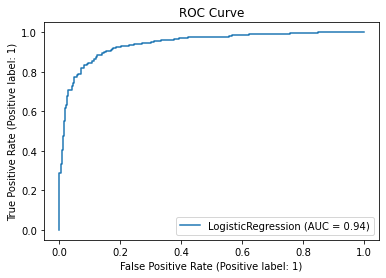

In [113]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(LR, x_test, y_test)
plt.title("ROC Curve")
plt.show()

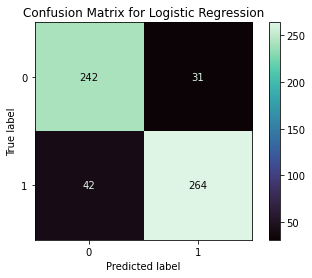

In [122]:
metrics.plot_confusion_matrix(LR, x_test, y_test, cmap='mako')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# DecisionTree Classifier

In [131]:
dtr=DecisionTreeClassifier()
dtr.fit(x_train, y_train)
preddtr=dtr.predict(x_test)
print("Accuaracy", accuracy_score(y_test, preddtr)*100)
print(confusion_matrix(y_test,preddtr))
print(classification_report(y_test,preddtr))

Accuaracy 81.86528497409327
[[215  58]
 [ 47 259]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       273
           1       0.82      0.85      0.83       306

    accuracy                           0.82       579
   macro avg       0.82      0.82      0.82       579
weighted avg       0.82      0.82      0.82       579



In [132]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(dtr, x, y, cv=5)
print("Cross validation score of Logistic Regression model:", scr.mean())

Cross validation score of Logistic Regression model: 0.804024540105757


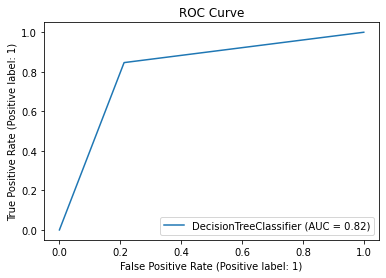

In [133]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(dtr, x_test, y_test)
plt.title("ROC Curve")
plt.show()

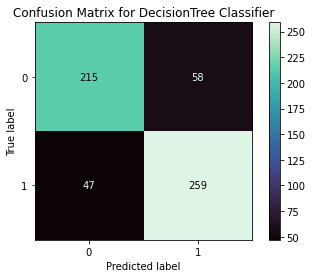

In [134]:
metrics.plot_confusion_matrix(dtr, x_test, y_test, cmap='mako')
plt.title('Confusion Matrix for DecisionTree Classifier')
plt.show()

# KNeighbors Classifier

In [137]:
knc=KNeighborsClassifier()
knc.fit(x_train, y_train)
predknc=knc.predict(x_test)
print("Accuaracy", accuracy_score(y_test, predknc)*100)
print(confusion_matrix(y_test,predknc))
print(classification_report(y_test,predknc))

Accuaracy 88.08290155440415
[[204  69]
 [  0 306]]
              precision    recall  f1-score   support

           0       1.00      0.75      0.86       273
           1       0.82      1.00      0.90       306

    accuracy                           0.88       579
   macro avg       0.91      0.87      0.88       579
weighted avg       0.90      0.88      0.88       579



In [138]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(knc, x, y, cv=5)
print("Cross validation score of Logistic Regression model:", scr.mean())

Cross validation score of Logistic Regression model: 0.8493250539956803


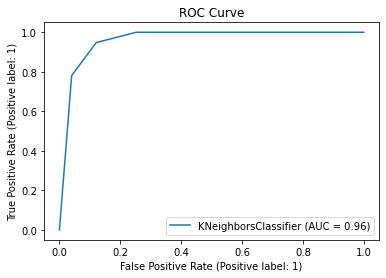

In [142]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(knc, x_test, y_test)
plt.title("ROC Curve")
plt.show()

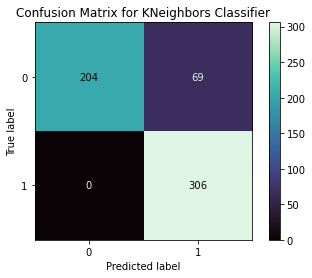

In [139]:
metrics.plot_confusion_matrix(knc, x_test, y_test, cmap='mako')
plt.title('Confusion Matrix for KNeighbors Classifier')
plt.show()

# Support Vector classifier

In [140]:
sv=SVC()
sv.fit(x_train, y_train)
predsv=sv.predict(x_test)
print("Accuaracy", accuracy_score(y_test, predsv)*100)
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

Accuaracy 92.05526770293609
[[257  16]
 [ 30 276]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       273
           1       0.95      0.90      0.92       306

    accuracy                           0.92       579
   macro avg       0.92      0.92      0.92       579
weighted avg       0.92      0.92      0.92       579



In [141]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(sv, x, y, cv=5)
print("Cross validation score of Logistic Regression model:", scr.mean())

Cross validation score of Logistic Regression model: 0.8722871825426382


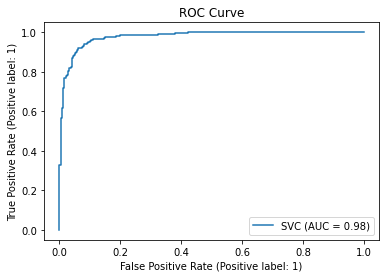

In [143]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(sv, x_test, y_test)
plt.title("ROC Curve")
plt.show()

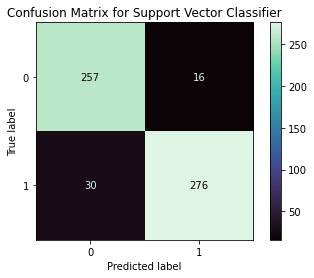

In [144]:
metrics.plot_confusion_matrix(sv, x_test, y_test, cmap='mako')
plt.title('Confusion Matrix for Support Vector Classifier')
plt.show()

# Ensemble Technique

In [145]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=200)
rf.fit(x_train, y_train)
predrf=rf.predict(x_test)
print("Accuaracy", accuracy_score(y_test, predrf)*100)  # testing accuracy
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuaracy 94.12780656303973
[[259  14]
 [ 20 286]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       273
           1       0.95      0.93      0.94       306

    accuracy                           0.94       579
   macro avg       0.94      0.94      0.94       579
weighted avg       0.94      0.94      0.94       579



In [146]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(rf, x, y, cv=5)
print("Cross validation score of Logistic Regression model:", scr.mean())

Cross validation score of Logistic Regression model: 0.903778766664184


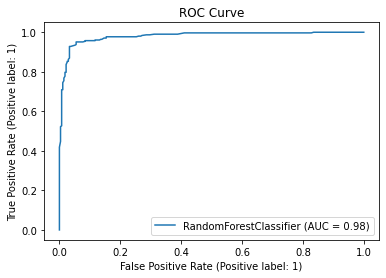

In [147]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(rf, x_test, y_test)
plt.title("ROC Curve")
plt.show()

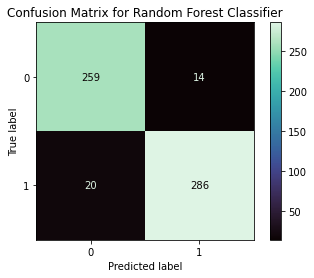

In [148]:
metrics.plot_confusion_matrix(rf, x_test, y_test, cmap='mako')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

In [149]:
RandomForestClassifier()

RandomForestClassifier()

In [150]:
from sklearn.model_selection import GridSearchCV

parameters={'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8],
           'criterion':['gini','entropy'],
           'n_estimators':[100,200,300,400,500]}

In [151]:
GCV=GridSearchCV(estimator=RandomForestClassifier(),
                param_grid=parameters,
                cv=5,
                scoring='accuracy')

In [154]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy')

In [155]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 400}

In [156]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [157]:
RandomForestClassifier()

RandomForestClassifier()

In [158]:
GCV.best_estimator_

RandomForestClassifier(max_depth=8, n_estimators=400)

In [159]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.92573402417962

# Saving the final model

In [162]:
import joblib

joblib.dump(rf,'HRmodel.obj')

HR_loadmodel=joblib.load('HRmodel.obj')
HR_loadmodel.predict(x_test)

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,

In [164]:
conclusion=pd.DataFrame([HR_loadmodel.predict(x_test)[:],predrf[:]],index=['Predicted','Original'])
conclusion

0    1    2    3    4    5    6    7    8    9    ...  569  570  \
Predicted    1    0    1    0    0    0    1    0    0    1  ...    0    1   
Original     1    0    1    0    0    0    1    0    0    1  ...    0    1   

           571  572  573  574  575  576  577  578  
Predicted    0    1    1    0    1    1    1    0  
Original     0    1    1    0    1    1    1    0  

[2 rows x 579 columns]